# GPS Spoofing in Autonomous Vehicles

Vehicle 1, Step 1: Speed = 62.01, Direction = 340.44, Altitude = 1317.61, Satellite Visibility = 0.82
--> Vehicle 1, Step 1: Spoofing Detected! Speed = 94.26, Direction = 286.06
Vehicle 1, Step 2: Speed = 94.16, Direction = 283.24, Altitude = 1289.31, Satellite Visibility = 0.84
Vehicle 1, Step 3: Speed = 84.51, Direction = 264.80, Altitude = 1256.12, Satellite Visibility = 0.91
--> Vehicle 1, Step 3: Spoofing Detected! Speed = 113.19, Direction = 213.33
Vehicle 1, Step 4: Speed = 123.94, Direction = 220.46, Altitude = 1252.42, Satellite Visibility = 0.93
--> Vehicle 1, Step 4: Spoofing Detected! Speed = 161.36, Direction = 208.26
Vehicle 1, Step 5: Speed = 154.30, Direction = 192.56, Altitude = 1265.40, Satellite Visibility = 0.97
--> Vehicle 1, Step 5: Spoofing Detected! Speed = 187.59, Direction = 172.90
Vehicle 1, Step 6: Speed = 206.39, Direction = 187.89, Altitude = 1285.01, Satellite Visibility = 1.00
Vehicle 1, Step 7: Speed = 219.48, Direction = 151.17, Altitude = 1254.85, Sat

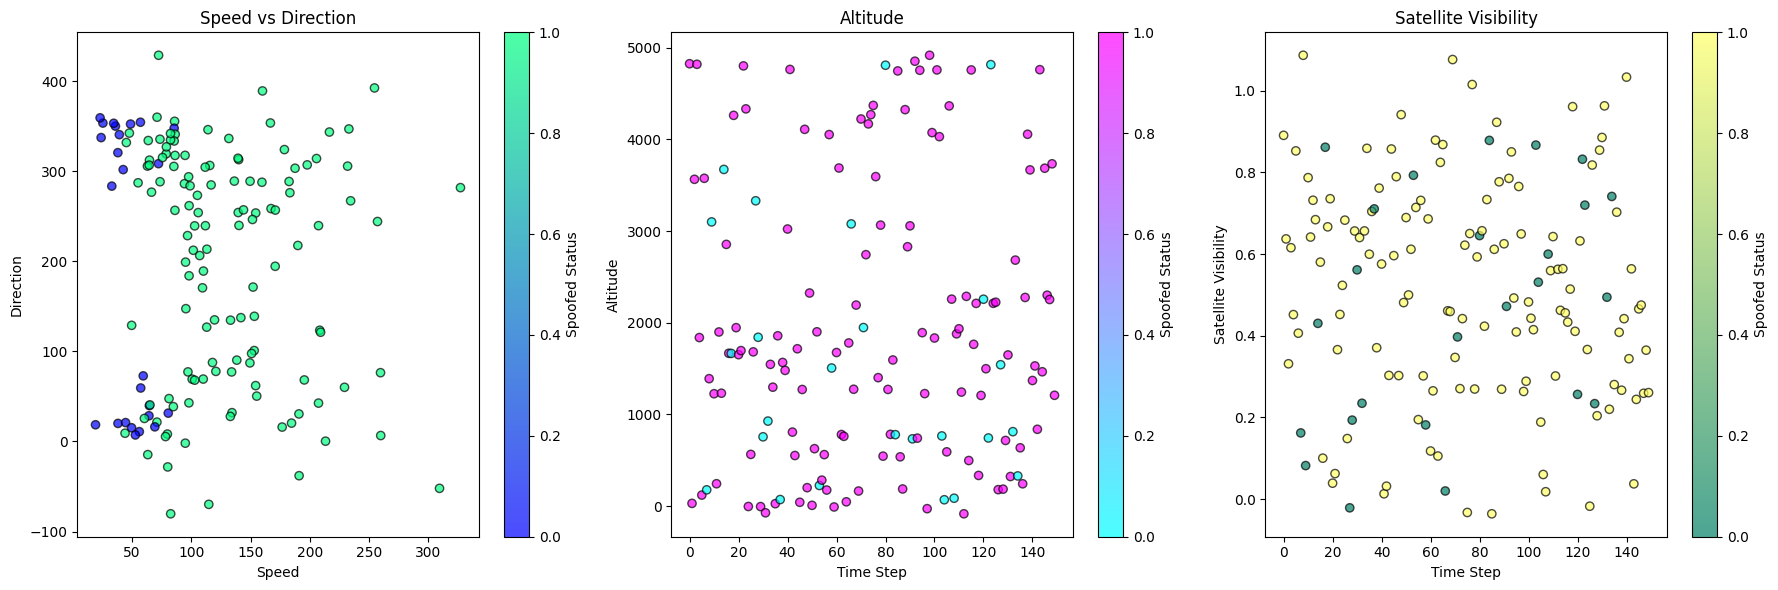

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import random

# Define a Vehicle class to simulate vehicle movements and potential GPS spoofing.
class Vehicle:
    def __init__(self, vehicle_id, initial_speed=50, initial_direction=0, environmental_noise=0.5):
        # Initialize vehicle properties
        self.vehicle_id = vehicle_id
        self.speed = initial_speed
        self.direction = initial_direction
        self.altitude = random.uniform(0, 5000)  # Random starting altitude
        self.satellite_visibility = random.uniform(0, 1)  # Random measure of satellite visibility
        self.is_spoofed = False  # Initially not spoofed
        self.environmental_noise = environmental_noise  # Environmental noise affecting movement

    # Simulate vehicle movement with randomness and environmental noise
    def simulate_movement(self, step):
        # Adjust speed and direction with some randomness and environmental noise
        self.speed = max(0, self.speed + random.uniform(-20, 20) + self.environmental_noise)
        self.direction = (self.direction + random.uniform(-40, 40) + self.environmental_noise) % 360
        # Random changes to altitude and satellite visibility
        self.altitude += random.uniform(-50, 50)
        self.satellite_visibility += random.uniform(-0.1, 0.1)
        # Print current state
        print(f"Vehicle {self.vehicle_id}, Step {step}: Speed = {self.speed:.2f}, Direction = {self.direction:.2f}, "
              f"Altitude = {self.altitude:.2f}, Satellite Visibility = {self.satellite_visibility:.2f}")

    # Introduce GPS spoofing to simulate an attack
    def introduce_spoofing(self, step):
        if random.random() < 0.4:  # 40% chance of spoofing
            self.is_spoofed = True
            # Simulate the effect of spoofing on speed and direction
            self.speed += random.uniform(20, 40)
            self.direction += random.uniform(-90, 90)
            # Random changes during spoofing
            self.altitude += random.uniform(-50, 50)
            self.satellite_visibility += random.uniform(-0.1, 0.1)
            # Indicate spoofing detection
            print(f"--> Vehicle {self.vehicle_id}, Step {step}: Spoofing Detected! Speed = {self.speed:.2f}, "
                  f"Direction = {self.direction:.2f}")

# Generate simulated data for a vehicle over a number of steps
def generate_vehicle_data(vehicle, steps=60):
    data = []
    for step in range(1, steps + 1):
        vehicle.simulate_movement(step)
        vehicle.introduce_spoofing(step)
        # Append the vehicle's state to the dataset
        data.append([vehicle.speed, vehicle.direction, vehicle.altitude, vehicle.satellite_visibility, vehicle.is_spoofed])
    return np.array(data)

# Create a dataset for multiple vehicles
def create_dataset(num_vehicles=5, steps_per_vehicle=20):
    all_data = []
    for vehicle_id in range(1, num_vehicles + 1):
        vehicle = Vehicle(vehicle_id)
        vehicle_data = generate_vehicle_data(vehicle, steps=steps_per_vehicle)
        all_data.extend(vehicle_data)
    return np.array(all_data)

# Train a RandomForest model to detect spoofing
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.2f}")
    return model, X_test, y_test, y_pred

# Visualize the results of the model's predictions
def visualize_results(X, y_real, y_pred):
    plt.figure(figsize=(18, 6))

    # Plotting setups for Speed vs Direction, Altitude, and Satellite Visibility
    plt.subplot(1, 3, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y_real, cmap='winter', edgecolor='k', alpha=0.7)
    plt.title('Speed vs Direction')
    plt.xlabel('Speed')
    plt.ylabel('Direction')
    plt.colorbar(label='Spoofed Status')

    plt.subplot(1, 3, 2)
    plt.scatter(range(len(X)), X[:, 2], c=y_real, cmap='cool', edgecolor='k', alpha=0.7)
    plt.title('Altitude')
    plt.xlabel('Time Step')
    plt.ylabel('Altitude')
    plt.colorbar(label='Spoofed Status')

    plt.subplot(1, 3, 3)
    plt.scatter(range(len(X)), X[:, 3], c=y_real, cmap='summer', edgecolor='k', alpha=0.7)
    plt.title('Satellite Visibility')
    plt.xlabel('Time Step')
    plt.ylabel('Satellite Visibility')
    plt.colorbar(label='Spoofed Status')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots

# Main function to execute the process
def main():
    # Generate a dataset for a specified number of vehicles and steps per vehicle
    dataset = create_dataset(num_vehicles=50, steps_per_vehicle=10)
    X, y = dataset[:, :4], dataset[:, 4].astype(int)  # Split dataset into features and labels

    model, X_test, y_test, y_pred = train_model(X, y)  # Train the model and make predictions
    visualize_results(X_test, y_test, y_pred)  # Visualize the prediction results

# Entry point of the script
if __name__ == "__main__":
    main()